In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

from wrangle import wrangle_zillow
from wrangle import split_data
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = wrangle_zillow()
df.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [3]:
train, validate, test = split_data(df)
train.head(), validate.head(), test.head()

(              id  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 1117987  1548009         3.0          2.5                        1666.0   
 1191903  1650884         4.0          3.0                        2252.0   
 1017502  1409335         2.0          1.0                         822.0   
 547681    757700         4.0          2.0                        2248.0   
 2073553  2872235         3.0          2.0                        1628.0   
 
          taxvaluedollarcnt  yearbuilt  taxamount    fips  
 1117987           469000.0     1974.0    5650.24  6059.0  
 1191903           144382.0     1977.0    2152.21  6037.0  
 1017502           155688.0     1951.0    2281.97  6037.0  
 547681             84000.0     1965.0    1203.38  6059.0  
 2073553           395947.0     1941.0    4960.36  6037.0  ,
               id  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 21825      30467         5.0          3.5                        3067.0   
 979199   1355022         2.0

In [4]:
x_train = train.drop(columns=['taxvaluedollarcnt', 'id'])
y_train = train.taxvaluedollarcnt

x_validate = validate.drop(columns=['taxvaluedollarcnt', 'id'])
y_validate = validate.taxvaluedollarcnt

x_test = test.drop(columns=['taxvaluedollarcnt', 'id'])
y_test = test.taxvaluedollarcnt

x_train.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

Text(0.5, 1.0, 'Original')

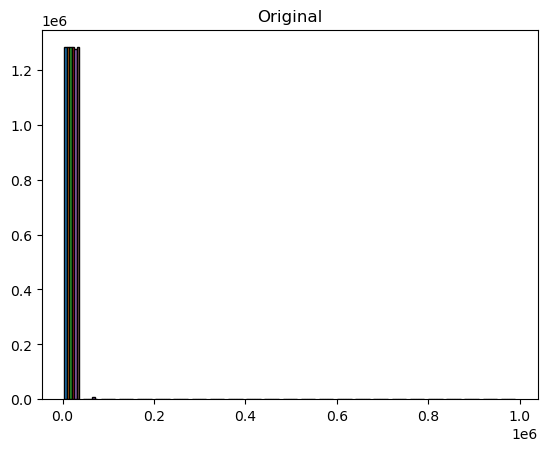

In [7]:
scaler_minmax = sklearn.preprocessing.MinMaxScaler()

scaler_minmax.fit(x_train)

x_train_scaled_minmax = scaler_minmax.transform(x_train)
x_validate_scaled_minmax = scaler_minmax.transform(x_validate)

plt.hist(x_train, bins=25, ec='black')
plt.title('Original')


Text(0.5, 1.0, 'Scaled')

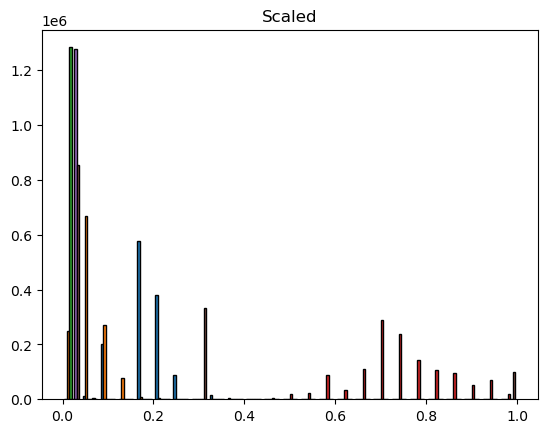

In [6]:
plt.hist(x_train_scaled_minmax, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

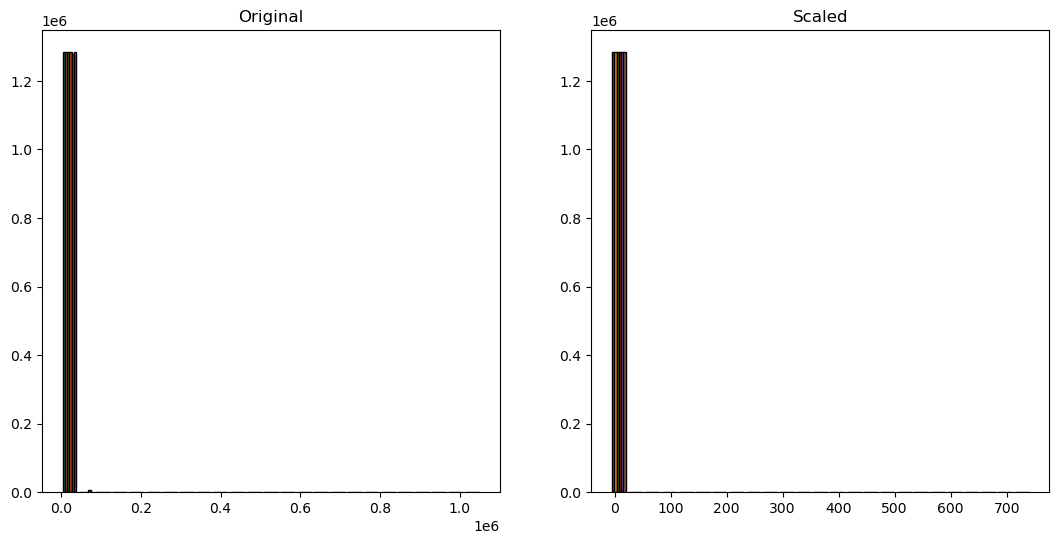

In [5]:
scaler_standard = sklearn.preprocessing.StandardScaler()

scaler_standard.fit(x_train)

x_train_scaled_standard = scaler_standard.transform(x_train)
x_validate_scaled_standard = scaler_standard.transform(x_validate)
x_test_scaled_standard = scaler_standard.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_standard, bins=25, ec='black')
plt.title('Scaled')


Text(0.5, 1.0, 'Scaled')

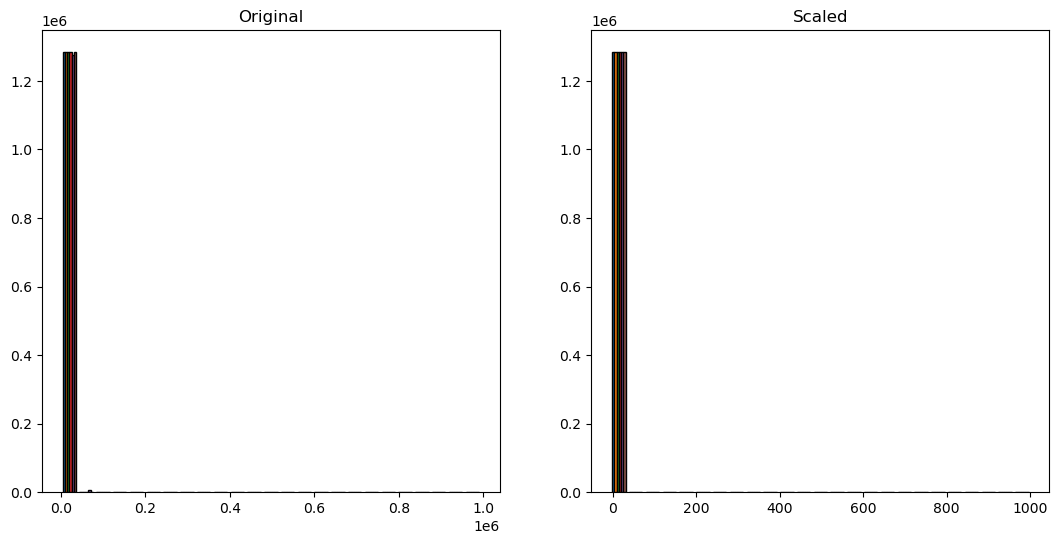

In [5]:
scaler_robust = sklearn.preprocessing.RobustScaler()

scaler_robust.fit(x_train)

x_train_scaled_robust = scaler_robust.transform(x_train)
x_validate_scaled_robust = scaler_robust.transform(x_validate)
x_test_scaled_robust = scaler_robust.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_robust, bins=25, ec='black')
plt.title('Scaled')


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [11]:
inverse_minmax_transform = scaler_minmax.inverse_transform(x_train_scaled_minmax)
inverse_minmax_transform

array([[3.00000e+00, 4.00000e+00, 3.05500e+03, 1.95700e+03, 5.85717e+03,
        6.03700e+03],
       [3.00000e+00, 4.00000e+00, 3.51900e+03, 1.93800e+03, 7.59152e+03,
        6.03700e+03],
       [4.00000e+00, 2.00000e+00, 1.74100e+03, 1.96400e+03, 1.23884e+03,
        6.03700e+03],
       ...,
       [3.00000e+00, 2.00000e+00, 1.40500e+03, 1.96200e+03, 5.48280e+03,
        6.05900e+03],
       [2.00000e+00, 1.00000e+00, 1.17600e+03, 1.94000e+03, 7.79250e+02,
        6.03700e+03],
       [1.00000e+00, 1.00000e+00, 8.49000e+02, 1.94500e+03, 1.52118e+03,
        6.03700e+03]])

In [6]:
inverse_standard_transform = scaler_standard.inverse_transform(x_train_scaled_standard)
inverse_standard_transform

array([[4.00000e+00, 3.00000e+00, 2.44200e+03, 2.00000e+03, 1.20413e+04,
        6.05900e+03],
       [3.00000e+00, 3.50000e+00, 2.66400e+03, 1.96500e+03, 8.34880e+03,
        6.05900e+03],
       [2.00000e+00, 2.00000e+00, 1.42300e+03, 1.94600e+03, 7.93701e+03,
        6.03700e+03],
       ...,
       [4.00000e+00, 2.00000e+00, 2.36900e+03, 1.96500e+03, 4.76272e+03,
        6.05900e+03],
       [4.00000e+00, 2.50000e+00, 2.41400e+03, 2.00100e+03, 7.58022e+03,
        6.05900e+03],
       [3.00000e+00, 2.00000e+00, 1.24000e+03, 1.95000e+03, 9.96654e+03,
        6.03700e+03]])

In [ ]:
inverse_robust_transform = scaler_robust.inverse_transform(x_train_scaled_robust)
inverse_robust_transform

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Text(0.5, 1.0, 'Scaled')

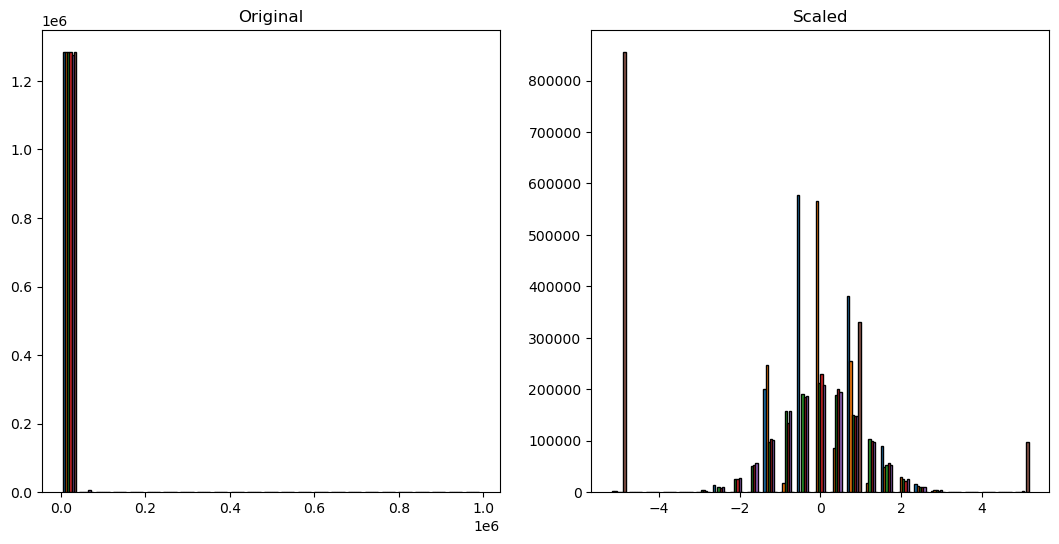

In [7]:
quantile_transformation = QuantileTransformer(output_distribution='normal').fit_transform(x_train)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quantile_transformation, bins=25, ec='black')
plt.title('Scaled')

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Text(0.5, 1.0, 'Scaled')

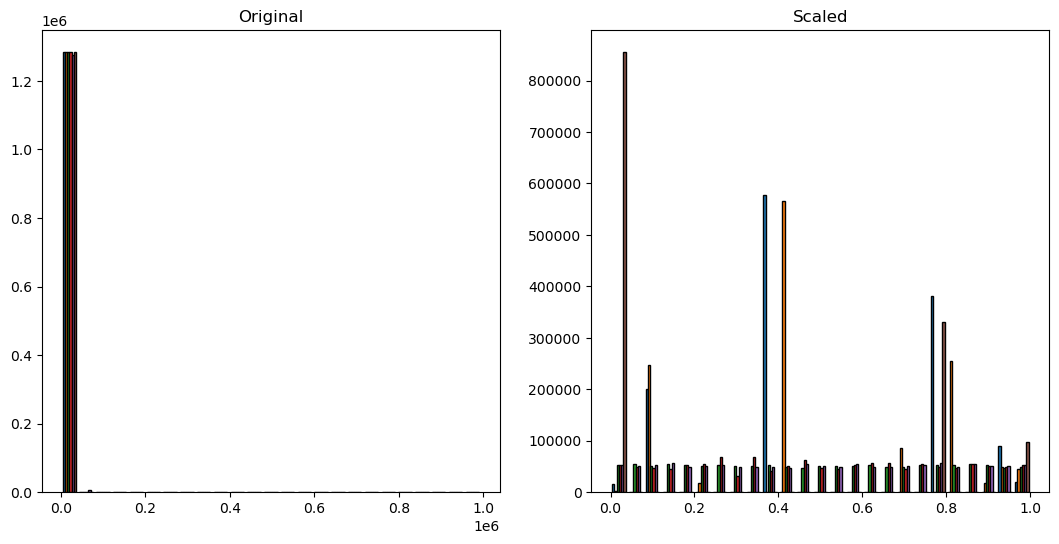

In [8]:
quantile_transformation = QuantileTransformer().fit_transform(x_train)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quantile_transformation, bins=25, ec='black')
plt.title('Scaled')

distribution is uniform, not normal

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def minmax_scale(train, validate, test)
    scaler_minmax = sklearn.preprocessing.MinMaxScaler()

    scaler_minmax.fit(x_train)

    x_train_scaled_minmax = scaler_minmax.transform(x_train)
    x_validate_scaled_minmax = scaler_minmax.transform(x_validate)
    x_test_scaled_minmax = scaler_minmax.transform(x_test)
    
    return x_train_scaled_minmax, x_validate_scaled_minmax, x_test_scaled_minmax